# carbonation module example
+ Raw parameter data
+ initialize model
+ run model
+ calibrate model

In [1]:
%matplotlib inline
import math_helper as mh
import numpy as np
from carbonation import CarbonationModel, load_df_R_ACC

/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/carbonation.py:293: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/carbonation.py:88: RuntimeWarning: invalid value encountered in sqrt
  ) ** 0.5 * pars.W_t


Pf(g = R-S < 0) from various methods
    sample count: 0.0003002221644016572
    g integral: 0.00028284730562886496
    R S integral: 0.0003077886027744219
    beta_factor: 3.467469349866366
26.056632253044842 0.00016582634340176047


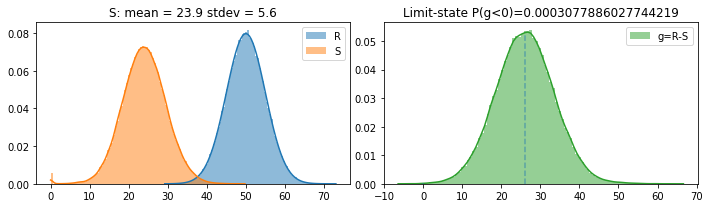

In [2]:
# Case study 

# global - Raw parameters
class Param: pass

pars = Param()

pars.cover_mean = 50  # mm
pars.cover_std = 5
pars.RH_real = 60
pars.t_c = 28
pars.x_c = 0.008  # m
pars.ToW = 2 / 52.
pars.p_SR = 0.0
pars.C_S_emi = 0.

pars.option = Param()
pars.option.choose = False
pars.option.cement_type = 'CEM_I_42.5_R+SF'
pars.option.wc_eqv = 0.6
pars.option.df_R_ACC = load_df_R_ACC()
pars.option.plot = True

# initialize model
carb_model = CarbonationModel(pars)

# run and postproc model
carb_model.run(50)
carb_model.postproc(plot=True)

In [3]:
# calibration to field data
# field data: field carbonation after 20 years, mean=30, std=5
carb_depth_field = mh.normal_custom(30, 5, n_sample=12)  # mm 

carb_model_cal = carb_model.calibrate(20, carb_depth_field, print_out=True)


carb_depth:
model: 
mean:29.300935792923333
std:6.137773756220821
field: 
mean:29.293218921943478
std:3.2550737972545813


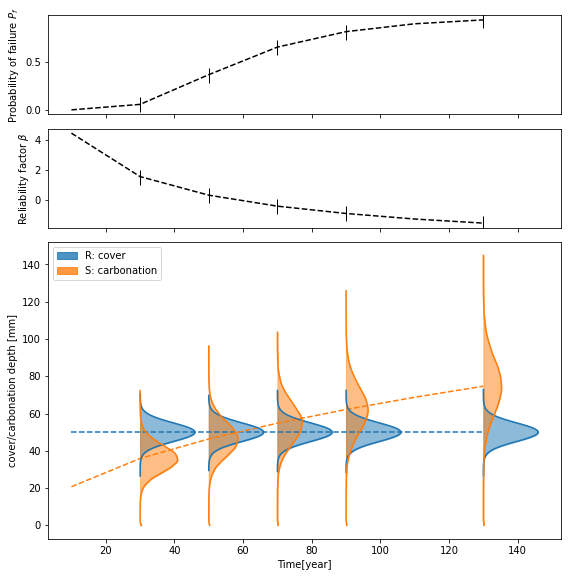

In [4]:
# carbonation for a list of time steps

year_lis = np.arange(10,150,20)

pf_lis, beta_lis = carb_model_cal.carb_with_year(year_lis=year_lis, plot=True, amplify=200)


In [5]:
# fig.savefig('RS_time_carbonation.pdf',dpi=1200)
